In [1]:
from subprocess import Popen, PIPE, STDOUT
import os

def run(dataset_file, max_tree_cnt, grid_num_to_print, n_cnt, x_min, x_max, y_min, y_max):
    args = ["java", "-jar", "kotlin.jar"]
    my_env = os.environ.copy()
    my_env["JAVA_HOME"] = "/home/Valeriy.Teplyakov/JBJDK-11"
    p = Popen(args, stdout=PIPE, stdin=PIPE, stderr=STDOUT, env=my_env)
    input = dataset_file + "\n"
    input += str(max_tree_cnt) + "\n"
    input += " ".join(list(map(str, grid_num_to_print))) + "\n"
    input += str(n_cnt) + " " + str(x_min) + " " + str(x_max) + " " + str(y_min) + " " + str(y_max) + "\n"
    p_stdout = p.communicate(input=bytes(input, encoding='utf-8'))[0]
    return p_stdout.decode('utf-8').strip()

In [2]:
max_tree_cnt = 10000
grid_num_to_print = [1, 2, 3, 5, 8, 13, 21, 34, 55, max_tree_cnt // 10, max_tree_cnt]
n_cnt = 400 
def prodess_data(dataset_file, x_min, x_max, y_min, y_max):
    data = run(dataset_file, max_tree_cnt, grid_num_to_print, n_cnt, x_min, x_max, y_min, y_max).split()
    accuracy = list(map(float, data[:max_tree_cnt]))
    data = data[max_tree_cnt:]
    grids = []
    for grid in grid_num_to_print:
        grid = []
        for row in range(n_cnt):
            grid.append(list(map(int, data[:n_cnt])))
            data = data[n_cnt:]
        grids.append(grid)
    return (accuracy, grids)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def render(fig, ind, dataset, grid, x_min, x_max, y_min, y_max):        
    ax = fig.add_subplot(10, 3, ind + 1)
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.set_title("Iter: {}".format(grid_num_to_print[ind]), fontsize=20)
                
    xs, ys = np.meshgrid(np.arange(x_min, x_max + (x_max - x_min) / n_cnt, (x_max - x_min) / n_cnt),
                         np.arange(y_min, y_max + (y_max - y_min) / n_cnt, (y_max - y_min) / n_cnt))
    ax.pcolormesh(xs, ys, grid, cmap=ListedColormap(["lightcoral", "limegreen"]))
    
    target_names = ["P", "N"]
    colors = ['green', 'red']
    for target, color in zip(target_names, colors):
        indicesToKeep = dataset['class'] == target
        ax.scatter(dataset.loc[indicesToKeep, 'x'],
                   dataset.loc[indicesToKeep, 'y'],
                   c=color, s=50)
    ax.legend(["P", "N"])
    ax.grid()

In [4]:
import pandas as pd

def render_all(filename, grids, x_min, x_max, y_min, y_max):
    fig = plt.figure(figsize=(20, 70))
    dataset = pd.read_csv("data/{}".format(filename))
    for ind in range(len(grid_num_to_print)):
        render(fig, ind, dataset, grids[ind], x_min, x_max, y_min, y_max)
        print("\r{}/{}".format(ind + 1, len(grid_num_to_print)), end = '')

In [5]:
def plot_accuracy(filename, accuracy):
    fig = plt.figure(figsize=(15, 10))
    plt.title(filename, fontsize=18)
    plt.xlabel('Tree cnt', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.plot(list(range(len(accuracy))), accuracy, label='Accuracy', lw=2)
    plt.legend()
    plt.grid(linestyle=':')

In [6]:
chips_accuracy, chips_grids = prodess_data("chips.txt", -1, 1.5, -1, 1.5)

11/11

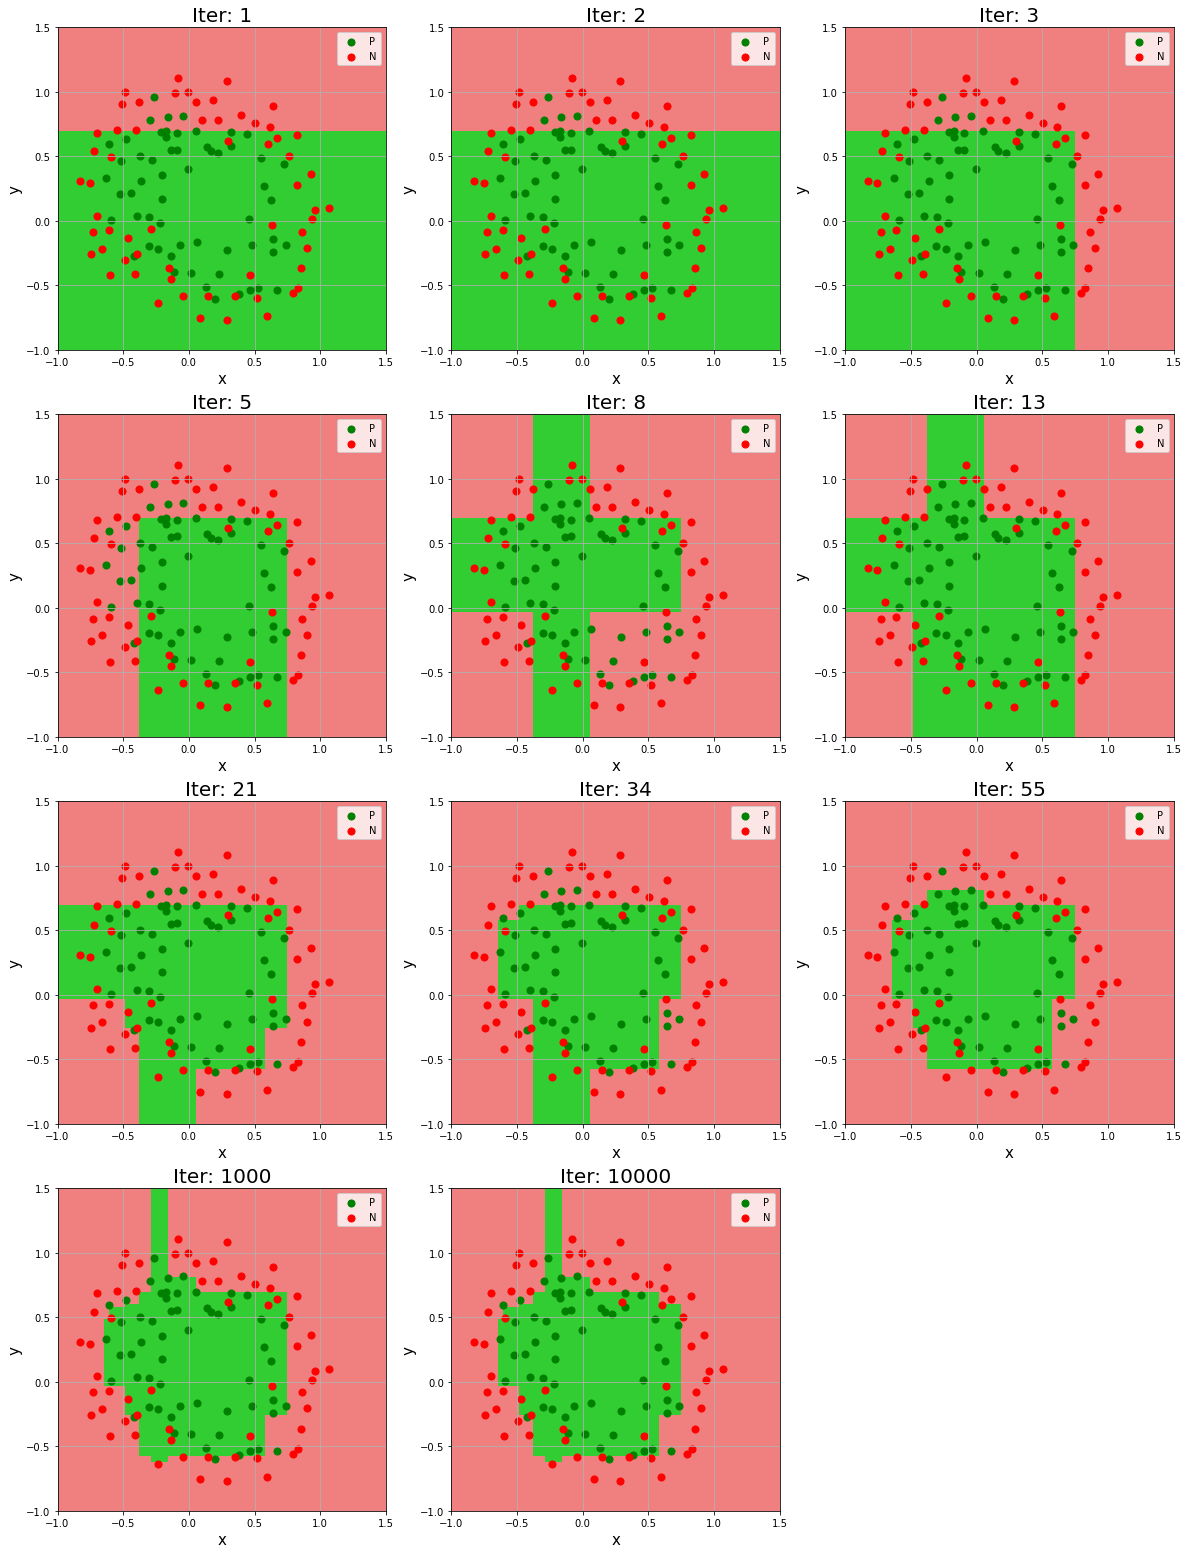

In [7]:
render_all("chips.csv", chips_grids, -1, 1.5, -1, 1.5)

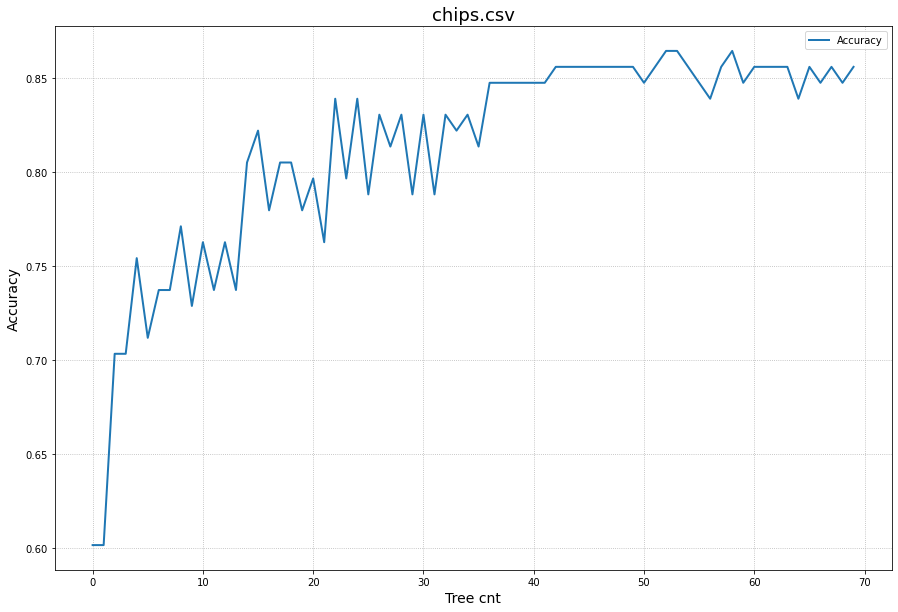

In [8]:
plot_accuracy("chips.csv", chips_accuracy[:70])

In [14]:
print(max(chips_accuracy))

0.8728813559322034


AttributeError: 'list' object has no attribute 'indexOf'

In [9]:
geyser_accuracy, geyser_grids = prodess_data("geyser.txt", 0, 26, 1, 6)

11/11

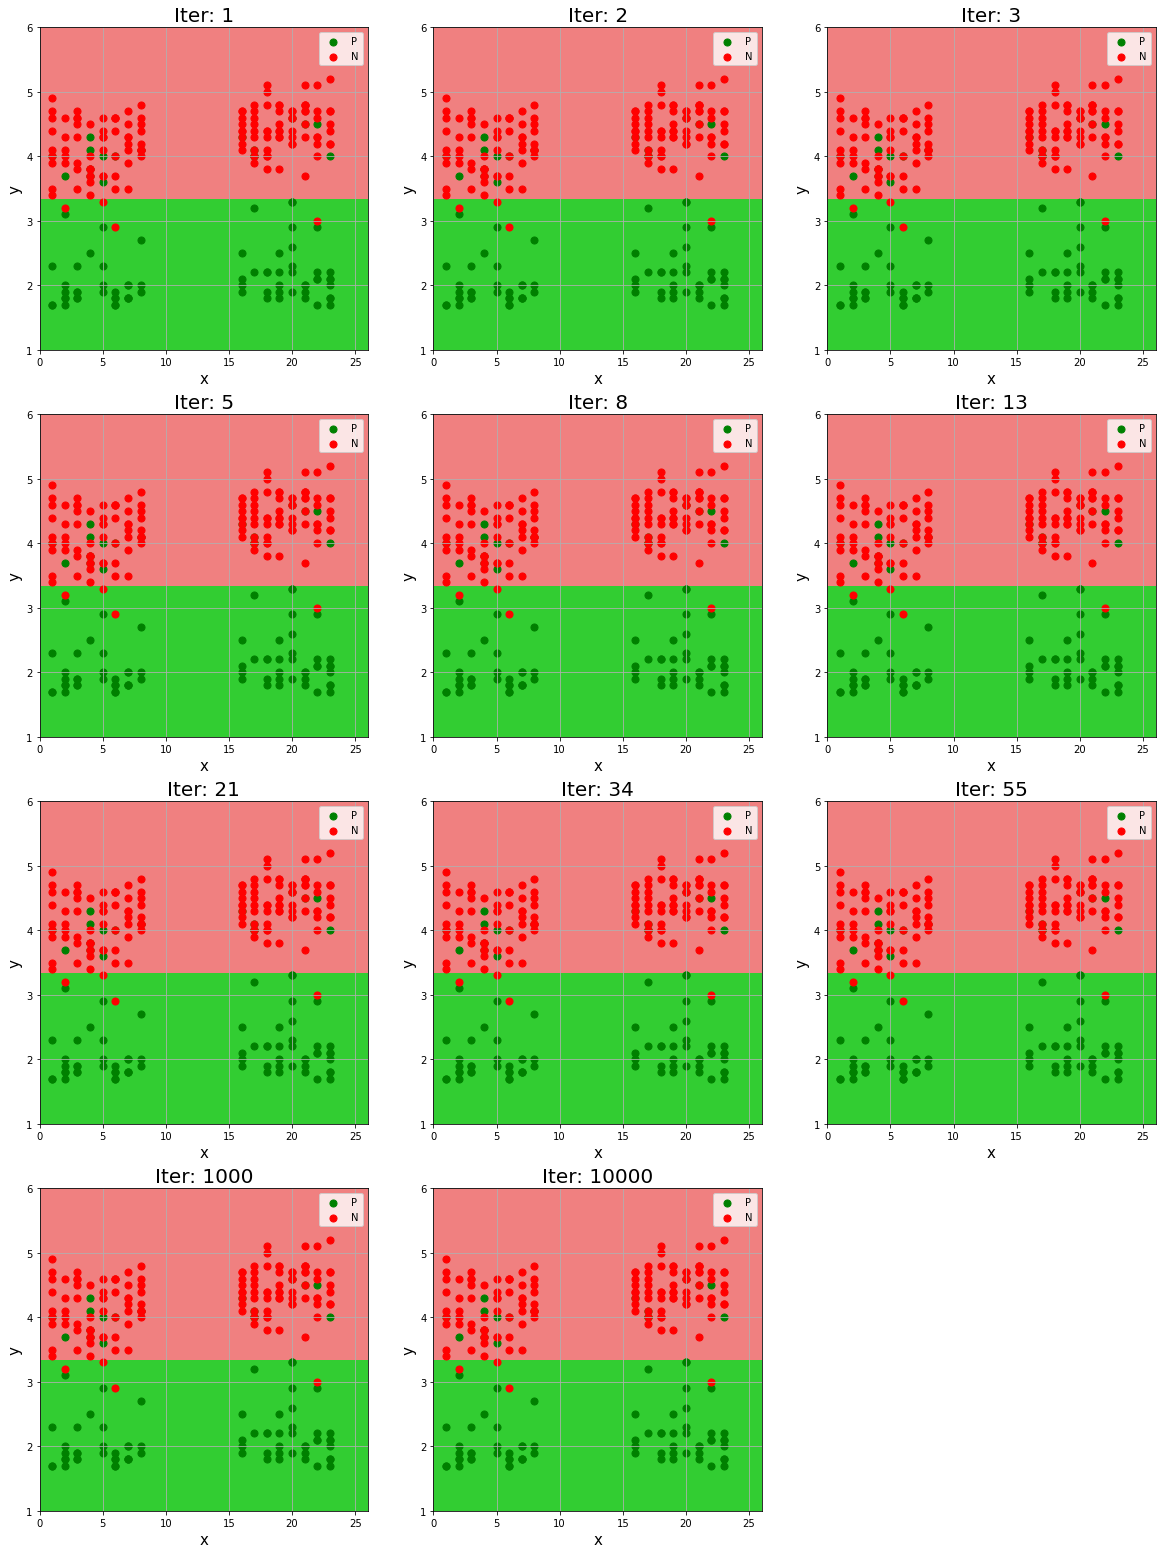

In [10]:
render_all("geyser.csv", geyser_grids, 0, 26, 1, 6)

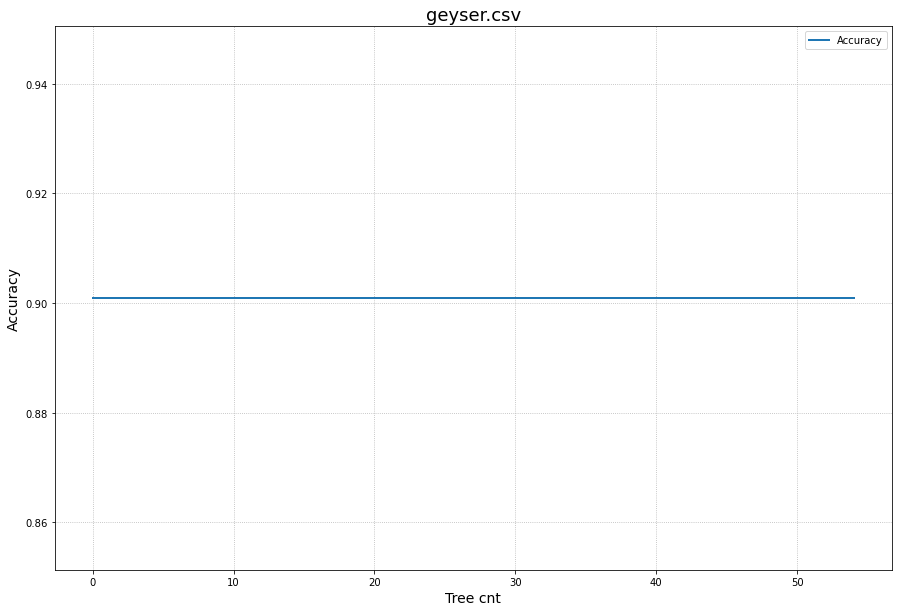

In [11]:
plot_accuracy("geyser.csv", geyser_accuracy[:55])